In [1]:
from __future__ import division
from __future__ import print_function

import time
import numpy as np

import torch
import torch.nn.functional as F
import torch.optim as optim

from utils import load_data, test, run_experiment
from models import GCN_2, GCN_3, ite_GCN

In [2]:
adj, features, labels, idx_train, idx_val, idx_test = load_data(path="../data/cora/", dataset="cora")

Loading cora dataset...


In [3]:
hidden = 16
dropout = 0.5
lr = 0.01
weight_decay = 5e-4
num_epochs = 200
smooth_fac = 0.2

Intialize a 2-layer GCN
runrunrun!
Epoch: 0001 loss_train: 1.9694 acc_train: 0.2357 loss_val: 1.9197 acc_val: 0.3500 time: 0.0359s
Epoch: 0002 loss_train: 1.9612 acc_train: 0.2857 loss_val: 1.9095 acc_val: 0.3500 time: 0.0082s
Epoch: 0003 loss_train: 1.9505 acc_train: 0.2929 loss_val: 1.8998 acc_val: 0.3500 time: 0.0072s
Epoch: 0004 loss_train: 1.9398 acc_train: 0.2929 loss_val: 1.8907 acc_val: 0.3500 time: 0.0084s
Epoch: 0005 loss_train: 1.9255 acc_train: 0.2929 loss_val: 1.8821 acc_val: 0.3500 time: 0.0072s
Epoch: 0006 loss_train: 1.9204 acc_train: 0.2929 loss_val: 1.8739 acc_val: 0.3500 time: 0.0074s
Epoch: 0007 loss_train: 1.9140 acc_train: 0.2929 loss_val: 1.8659 acc_val: 0.3500 time: 0.0069s
Epoch: 0008 loss_train: 1.9048 acc_train: 0.2929 loss_val: 1.8580 acc_val: 0.3500 time: 0.0084s
Epoch: 0009 loss_train: 1.9002 acc_train: 0.2929 loss_val: 1.8502 acc_val: 0.3500 time: 0.0081s
Epoch: 0010 loss_train: 1.8802 acc_train: 0.2929 loss_val: 1.8422 acc_val: 0.3500 time: 0.0077s
Epoch

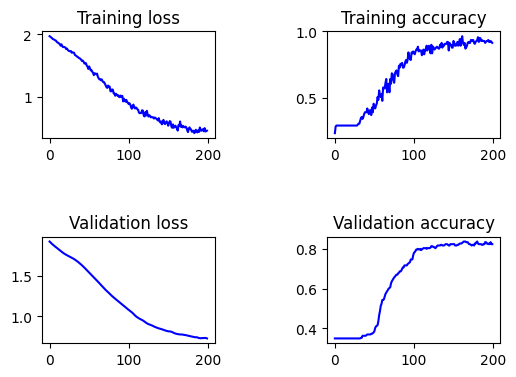

Test set results: loss= 0.7648 accuracy= 0.8370
inference time:  0.0026290416717529297


In [4]:
model0 = GCN_2(nfeat=features.shape[1],
            nhid=hidden,
            nclass=labels.max().item() + 1,
            dropout=dropout
)
run_experiment(num_epochs=num_epochs, model=model0, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)


Intialize a 3-layer GCN
runrunrun!
Epoch: 0001 loss_train: 2.0442 acc_train: 0.1000 loss_val: 1.9918 acc_val: 0.1033 time: 0.0110s
Epoch: 0002 loss_train: 1.9901 acc_train: 0.0786 loss_val: 1.9515 acc_val: 0.1033 time: 0.0090s
Epoch: 0003 loss_train: 1.9509 acc_train: 0.0929 loss_val: 1.9163 acc_val: 0.1033 time: 0.0086s
Epoch: 0004 loss_train: 1.9084 acc_train: 0.2143 loss_val: 1.8854 acc_val: 0.3500 time: 0.0086s
Epoch: 0005 loss_train: 1.8862 acc_train: 0.2214 loss_val: 1.8595 acc_val: 0.3500 time: 0.0077s
Epoch: 0006 loss_train: 1.8751 acc_train: 0.2929 loss_val: 1.8382 acc_val: 0.3500 time: 0.0077s
Epoch: 0007 loss_train: 1.8498 acc_train: 0.2500 loss_val: 1.8212 acc_val: 0.3500 time: 0.0083s
Epoch: 0008 loss_train: 1.8482 acc_train: 0.2857 loss_val: 1.8086 acc_val: 0.3500 time: 0.0084s
Epoch: 0009 loss_train: 1.8269 acc_train: 0.3214 loss_val: 1.7995 acc_val: 0.3500 time: 0.0078s
Epoch: 0010 loss_train: 1.8003 acc_train: 0.3143 loss_val: 1.7935 acc_val: 0.3500 time: 0.0076s
Epoch

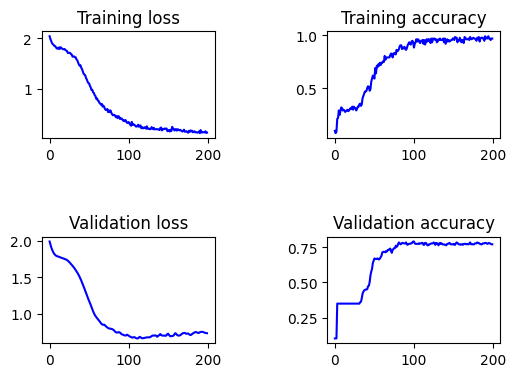

Test set results: loss= 0.6378 accuracy= 0.8090
inference time:  0.0030519962310791016


In [5]:
model1 = GCN_3(nfeat=features.shape[1],
            nhid=hidden,
            nclass=labels.max().item() + 1,
            dropout=dropout)
run_experiment(num_epochs=num_epochs, model=model1, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)


Unspecified or invalid number of iterations for inference. Treat as the same as training iterations.
Initialize a 1-layer GCN with  2 training iterations and  2  inference iterations.
Gradient flows to all iterations:  True
runrunrun!
Epoch: 0001 loss_train: 1.9446 acc_train: 0.2000 loss_val: 1.8117 acc_val: 0.3500 time: 0.3715s
Epoch: 0002 loss_train: 1.8270 acc_train: 0.2929 loss_val: 1.9675 acc_val: 0.3500 time: 0.3640s
Epoch: 0003 loss_train: 1.9834 acc_train: 0.2929 loss_val: 1.8006 acc_val: 0.3500 time: 0.3680s
Epoch: 0004 loss_train: 1.7881 acc_train: 0.3000 loss_val: 1.8492 acc_val: 0.1567 time: 0.3574s
Epoch: 0005 loss_train: 1.8345 acc_train: 0.2071 loss_val: 1.8320 acc_val: 0.1567 time: 0.3706s
Epoch: 0006 loss_train: 1.8058 acc_train: 0.2429 loss_val: 1.7757 acc_val: 0.1567 time: 0.3681s
Epoch: 0007 loss_train: 1.7359 acc_train: 0.2000 loss_val: 1.6960 acc_val: 0.1500 time: 0.3926s
Epoch: 0008 loss_train: 1.6433 acc_train: 0.2071 loss_val: 1.5797 acc_val: 0.3667 time: 0.362

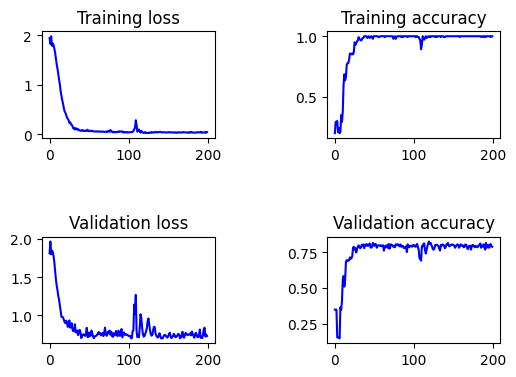

Test set results: loss= 0.6818 accuracy= 0.7960
inference time:  0.15617990493774414


In [6]:
model2 = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 2,
            eval_nite= 0,
            allow_grad=True,
            smooth_fac=smooth_fac)
run_experiment(num_epochs=num_epochs, model=model2, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)

Unspecified or invalid number of iterations for inference. Treat as the same as training iterations.
Initialize a 1-layer GCN with  3 training iterations and  3  inference iterations.
Gradient flows to all iterations:  True
runrunrun!
Epoch: 0001 loss_train: 1.9450 acc_train: 0.1571 loss_val: 1.8952 acc_val: 0.3500 time: 0.6684s
Epoch: 0002 loss_train: 1.9321 acc_train: 0.2929 loss_val: 1.9658 acc_val: 0.1267 time: 0.6564s
Epoch: 0003 loss_train: 1.9603 acc_train: 0.1214 loss_val: 1.9388 acc_val: 0.1267 time: 0.6696s
Epoch: 0004 loss_train: 1.9366 acc_train: 0.1857 loss_val: 1.9285 acc_val: 0.1567 time: 0.6754s
Epoch: 0005 loss_train: 1.9267 acc_train: 0.2286 loss_val: 1.8952 acc_val: 0.1567 time: 0.6673s
Epoch: 0006 loss_train: 1.8909 acc_train: 0.2071 loss_val: 1.8320 acc_val: 0.1567 time: 0.6960s
Epoch: 0007 loss_train: 1.8232 acc_train: 0.2000 loss_val: 1.8649 acc_val: 0.3500 time: 0.8163s
Epoch: 0008 loss_train: 1.8660 acc_train: 0.3000 loss_val: 1.7655 acc_val: 0.3500 time: 0.663

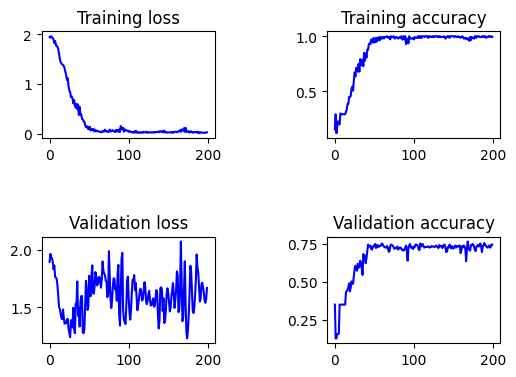

Test set results: loss= 1.5709 accuracy= 0.6910
inference time:  0.17517375946044922


In [7]:
model3 = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 3,
            eval_nite= 0,
            allow_grad=True,
            smooth_fac=smooth_fac)
run_experiment(num_epochs=num_epochs, model=model3, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)

In [8]:
test_losses = []
test_accuracies = []

for i in range(1, 30):
    model = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 2,
            eval_nite= i,
            allow_grad=True,
            smooth_fac=smooth_fac)
    model.load_state_dict(model2.state_dict().copy())
    loss_test, acc_test = test(model, features, adj, idx_test, labels)
    test_losses.append(loss_test.item())
    test_accuracies.append(acc_test.item())


Initialize a 1-layer GCN with  2 training iterations and  1  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.5778 accuracy= 0.5070
inference time:  0.05538582801818848
Initialize a 1-layer GCN with  2 training iterations and  2  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 0.6818 accuracy= 0.7960
inference time:  0.10526204109191895
Initialize a 1-layer GCN with  2 training iterations and  3  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 3.9501 accuracy= 0.6450
inference time:  0.16025876998901367
Initialize a 1-layer GCN with  2 training iterations and  4  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 56.8683 accuracy= 0.3750
inference time:  0.21746301651000977
Initialize a 1-layer GCN with  2 training iterations and  5  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 421.5637 accuracy= 0

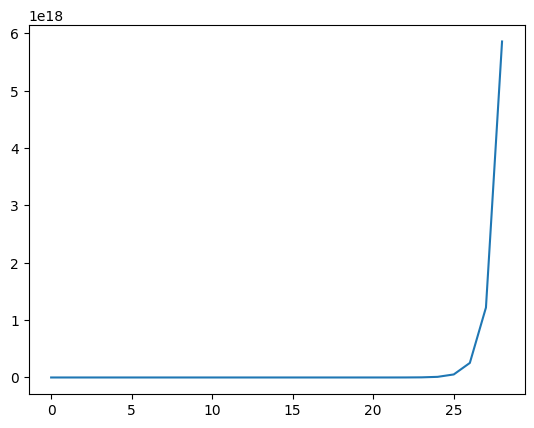

In [9]:
import matplotlib.pyplot as plt
plt.plot(test_losses)

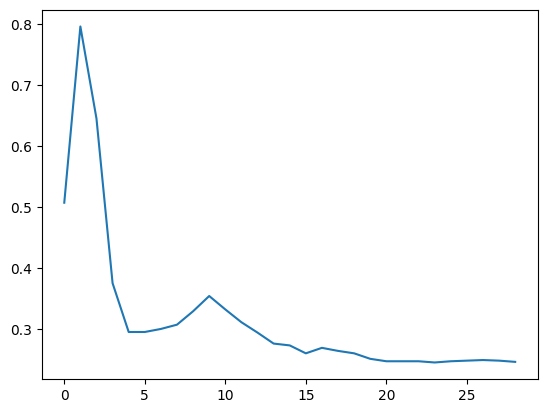

In [10]:
plt.plot(test_accuracies)

In [11]:
test_losses = []
test_accuracies = []

for i in range(1, 30):
    model = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=0,
            train_nite= 3,
            eval_nite= i,
            allow_grad=True,
            smooth_fac=smooth_fac)
    model.load_state_dict(model3.state_dict().copy())
    loss_test, acc_test = test(model, features, adj, idx_test, labels)
    test_losses.append(loss_test.item())
    test_accuracies.append(acc_test.item())


Initialize a 1-layer GCN with  3 training iterations and  1  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.8120 accuracy= 0.5810
inference time:  0.06245708465576172
Initialize a 1-layer GCN with  3 training iterations and  2  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.9480 accuracy= 0.2250
inference time:  0.11845970153808594
Initialize a 1-layer GCN with  3 training iterations and  3  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.5709 accuracy= 0.6910
inference time:  0.17633891105651855
Initialize a 1-layer GCN with  3 training iterations and  4  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 33.3512 accuracy= 0.2200
inference time:  0.277662992477417
Initialize a 1-layer GCN with  3 training iterations and  5  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 37.2760 accuracy= 0.65

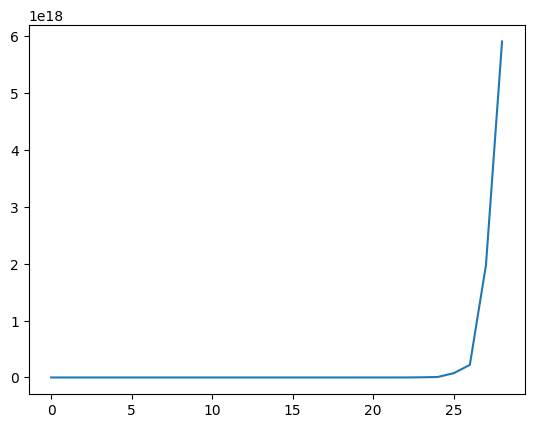

In [12]:
plt.plot(test_losses)

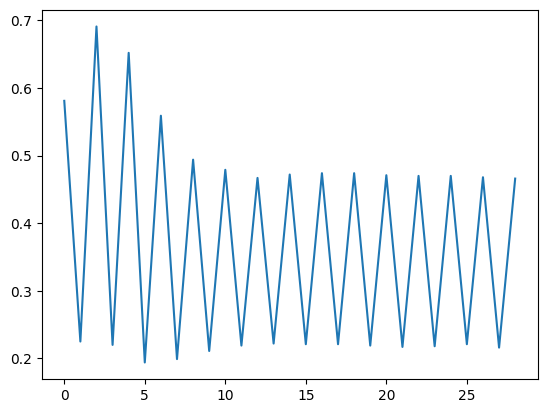

In [13]:
plt.plot(test_accuracies)